# Short Data Analysis using Unemployment in America Dataset 
(written in Spring 2023)
by Sujung Choi

* The Question I want to answer in this data analysis: 
1. Has the unemployment rate been decreasing in recent years?
2. How low is the US unemployment rate in 2022?

* Description of the dataset: 
In the dataset, each column contains the data about the following in order: 
FIPS Code, State/Area, Year, Month, Total Civilian Non-Institutional Population in State/Area, Total Civilian Labor Force in State/Area, Percent (%) of State/Area's Population, Total Employment in State/Area, Percent (%) of Labor Force Employed in State/Area, Total Unemployment in State/Area, Percent (%) of Labor Force Unemployed in State/Area.

* The civilian labor force indicates all individuals in the U.S. above 16 years old, and they are divided into two categories, either unemployed or employed. The Unemployment rate of a country is a critical key to measuring the state/condition of a country's economy. Therefore, it is important to keep track of the records of unemployment rates over the years. By plotting a graph in this analysis, we will see how the unemployment rates have been changed historically. 

* This dataset contains the information for every year from 1976 to 2022, for every month, and for every state. But as it is too large to look at each data one by one, we will combine all states as a whole and represent data per year by combining the monthly data. 

In [2]:
#load the dataset
import pandas as pd
data_filename = 'Unemployment_in_America_Per_ US_State.csv'
unemployment_rate_us = pd.read_csv(data_filename)

In [3]:
#get column names
unemployment_rate_us.columns

Index(['FIPS Code', 'State/Area', 'Year', 'Month',
       'Total Civilian Non-Institutional Population in State/Area',
       'Total Civilian Labor Force in State/Area',
       'Percent (%) of State/Area's Population',
       'Total Employment in State/Area',
       'Percent (%) of Labor Force Employed in State/Area',
       'Total Unemployment in State/Area',
       'Percent (%) of Labor Force Unemployed in State/Area'],
      dtype='object')

In [4]:
#get basic statistics of the columns including none values
unemployment_rate_us.describe(include='all')


,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
count,29892.000000,29892,29892.000000,29892.00000,2.989200e+04,2.989200e+04,29892.000000,2.989200e+04,29892.000000,2.989200e+04,29892.000000
unique,NaN,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,990.830189,NaN,1999.000000,6.50000,4.235528e+06,2.734826e+06,65.516202,2.565279e+06,61.670417,1.695473e+05,5.920788
std,6935.157218,NaN,13.564887,3.45211,4.603808e+06,2.942369e+06,4.304355,2.748895e+06,4.739074,2.145427e+05,2.207521
min,1.000000,NaN,1976.000000,1.00000,2.320000e+05,1.600220e+05,51.000000,1.487180e+05,41.600000,4.980000e+03,1.900000
25%,17.000000,NaN,1987.000000,3.75000,1.103986e+06,7.318940e+05,62.800000,6.795922e+05,58.600000,3.737100e+04,4.300000
50%,30.000000,NaN,1999.000000,6.50000,2.934918e+06,1.878042e+06,65.900000,1.750450e+06,61.800000,1.039425e+05,5.500000
75%,42.000000,NaN,2011.000000,9.25000,5.390502e+06,3.417254e+06,68.500000,3.230634e+06,65.100000,2.102450e+05,7.100000


In [5]:
#rename some column names to make it simple to use
unemployment_rate_us.rename(columns = {'State/Area':'state', 'Total Civilian Non-Institutional Population in State/Area': 'population', 
                                       'Total Civilian Labor Force in State/Area' : 'labor_force', 
                                       "Percent (%) of State/Area's Population": 'labor_force_population(%)',
                                        'Total Employment in State/Area': 'employment', 'Percent (%) of Labor Force Employed in State/Area':'employed(%)',
                                       'Total Unemployment in State/Area': 'unemployment',
                                       'Percent (%) of Labor Force Unemployed in State/Area': 'unemployed(%)'}, inplace = True)


In [6]:
#create new DF by selecting some columns that will be used for the analysis
unemployment_data = unemployment_rate_us[['Year', 'labor_force_population(%)', 'unemployed(%)']]

#group the data per year and find the average for each column representing the entire states per year
grouped = unemployment_data.groupby('Year').mean()
grouped


,labor_force_population(%),unemployed(%)
Year,,
1976,62.489151,7.166195
1977,63.128302,6.678145
1978,63.780503,5.730503
1979,64.247484,5.565094
1980,64.425000,6.843868
1981,64.542453,7.298270
1982,64.694340,9.203774
1983,64.701730,9.177201
1984,65.075000,7.302044


In [7]:
grouped.describe()

,labor_force_population(%),unemployed(%)
count,47.000000,47.000000
mean,65.516202,5.920788
std,1.741555,1.481958
min,62.273742,3.483176
25%,63.857469,4.915409
50%,65.994811,5.565094
75%,67.045676,6.947406
max,67.720597,9.203774


In [8]:
#extract all the years without duplicates by using unique function
year = unemployment_rate_us['Year']
years = year.unique()
years

array([1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022], dtype=int64)

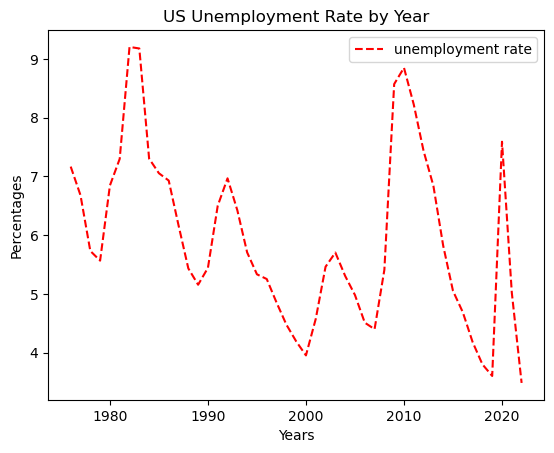

In [9]:
#create line plot graph by using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#x-axis shows the years and y-axis shows the unemployment rate
plt.plot(years, grouped['unemployed(%)'], 'r--', label = 'unemployment rate')

#add the title
plt.title("US Unemployment Rate by Year")

#add the labels
plt.xlabel("Years")
plt.ylabel("Percentages")

#display the legend
plt.legend()

In [10]:
#extract the data of 2022. As we know 2022 is the last year in this dataset, we can use tail() function to get the last row
rate_of_2022 = grouped.tail(1)
rate_of_2022

,labor_force_population(%),unemployed(%)
Year,,
2022,62.702673,3.483176


In [11]:
#find the minimum unemployment rate in the US history
min_rate = grouped['unemployed(%)'].min()
min_rate

3.4831761006289312

# Conclusion
* The graph shows the fluctuations of the historical US unemployment rate by year. Especially, in order to answer the first question, "Has the unemployment rate been decreasing in recent years?", plotting the graph shows that the unemployment rate in the last two years from 2020 has decreased. So I can conclude the unemployment rate has decreased recently. 
To answer the question of "How low the US unemployment rate in 2022?" the data was extracted and it shows the unemployment rate in 2022 was about 3.48%. Moreover, by finding the minimum unemployment rate from the year 1976 to 2022, the result shows 2022 unemployment rate was the lowest unemployment rate among the years the dataset provides. 